<a href="https://colab.research.google.com/github/santiagordz/tc3002b/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cards-image-datasetclassification


In [4]:
%cd "/kaggle/input/cards-image-datasetclassification"
!ls

/kaggle/input/cards-image-datasetclassification
'14card types-14-(200 X 200)-94.61.h5'	 cards.csv   train
'53cards-53-(200 X 200)-100.00.h5'	 test	     valid


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = "/kaggle/input/cards-image-datasetclassification"
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Found 7624 images belonging to 53 classes.
(32, 224, 224, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<Figure size 640x480 with 0 Axes>

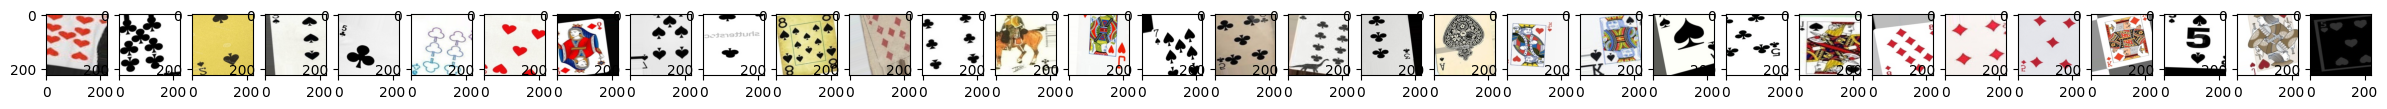

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [7]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(53, activation='softmax'))  # 53 clases

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(
    train_generator,
    epochs = 30
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 140s 550ms/step - accuracy: 0.0264 - loss: 3.9194
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 99s 414ms/step - accuracy: 0.1117 - loss: 3.2752
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 141s 410ms/step - accuracy: 0.1548 - loss: 3.0363
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 99s 415ms/step - accuracy: 0.1737 - loss: 2.8882
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 96s 403ms/step - accuracy: 0.2023 - loss: 2.8054
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 99s 414ms/step - accuracy: 0.2188 - loss: 2.7254
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 97s 404ms/step - accuracy: 0.2508 - loss: 2.6180
Epoch 8/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 95s 398ms/step - accuracy: 0.2717 - loss: 2.5617
Epoch 9/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 95s 398ms/step - accuracy: 0.2912 - loss: 2.4720
Epoch 10/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 96s 402ms/step - accuracy: 0.3019 - loss: 2.4148
Epoch 11/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 97s 405ms/step - accuracy: 0.3308 - loss: 2.3592
Epoch 12/30
239/2

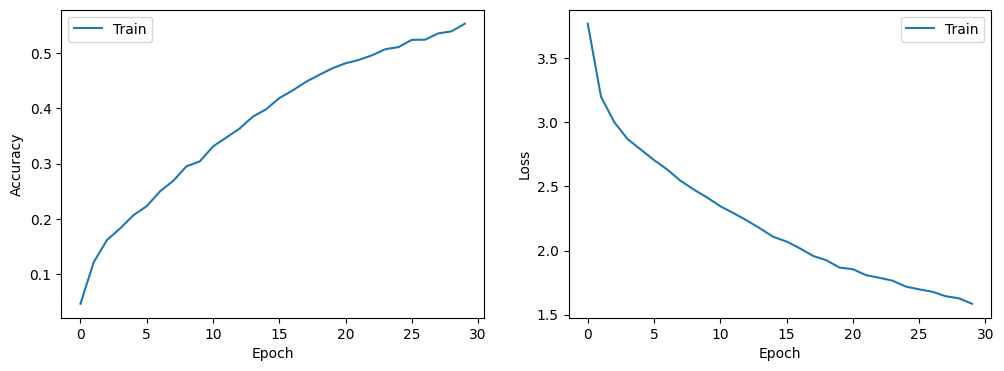

In [9]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 265 images belonging to 53 classes.


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step


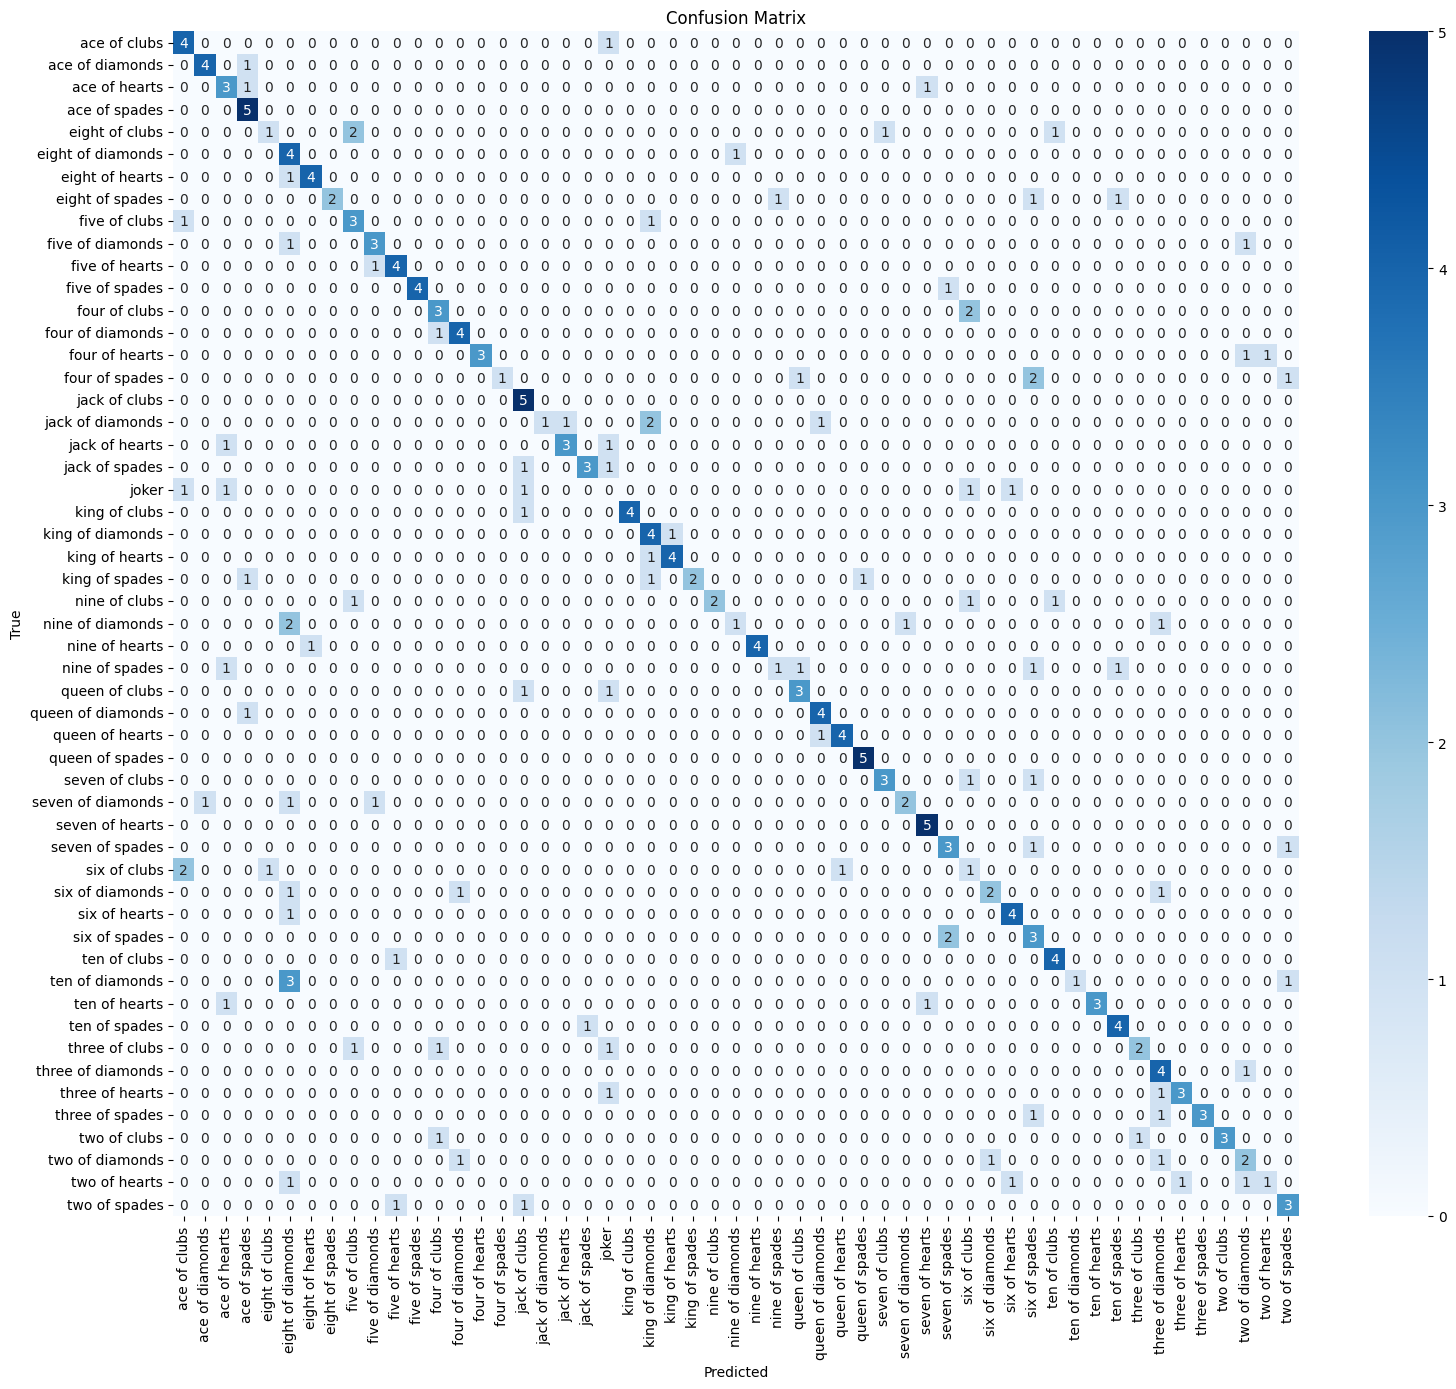

                   precision    recall  f1-score   support

     ace of clubs       0.50      0.80      0.62         5
  ace of diamonds       0.80      0.80      0.80         5
    ace of hearts       0.43      0.60      0.50         5
    ace of spades       0.56      1.00      0.71         5
   eight of clubs       0.50      0.20      0.29         5
eight of diamonds       0.27      0.80      0.40         5
  eight of hearts       0.80      0.80      0.80         5
  eight of spades       1.00      0.40      0.57         5
    five of clubs       0.43      0.60      0.50         5
 five of diamonds       0.60      0.60      0.60         5
   five of hearts       0.67      0.80      0.73         5
   five of spades       1.00      0.80      0.89         5
    four of clubs       0.50      0.60      0.55         5
 four of diamonds       0.67      0.80      0.73         5
   four of hearts       1.00      0.60      0.75         5
   four of spades       1.00      0.20      0.33       

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# After training your model, you'll need to get predictions on your validation/test set
# First, get the true labels from your validation generator
validation_generator.reset() # Reset generator to start from beginning
y_true = []
batch_count = 0
max_batches = validation_generator.samples // validation_generator.batch_size + 1

for i in range(max_batches):
    if batch_count < validation_generator.samples:
        x, y = next(validation_generator)
        y_true.extend(np.argmax(y, axis=1))
        batch_count += len(y)
    else:
        break

# Get predictions from your model
validation_generator.reset() # Reset generator again
y_pred = model.predict(validation_generator, steps=max_batches)
y_pred_classes = np.argmax(y_pred, axis=1)

# Limit to the actual number of samples (remove extra predictions)
y_pred_classes = y_pred_classes[:validation_generator.samples]
y_true = y_true[:validation_generator.samples]

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Get class names
class_names = list(validation_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print classification report for more detailed metrics
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# To see the most common misclassifications
misclassified = []
for true_label, pred_label in zip(y_true, y_pred_classes):
    if true_label != pred_label:
        misclassified.append((true_label, pred_label))

# Count frequency of each misclassification type
from collections import Counter
misclass_counts = Counter(misclassified)

# Print top N most common misclassifications
print("Top 10 most common misclassifications:")
for (true_idx, pred_idx), count in misclass_counts.most_common(10):
    print(f"True: {class_names[true_idx]}, Predicted: {class_names[pred_idx]}, Count: {count}")